In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
#importing the Data
dt=pd.read_csv('Churn_Modelling.csv')
dt.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [15]:
dt.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
dt.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [17]:
#Checking for NAN values
dt.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
#Dropping the unique Values which do not have impact on the Target
dt.drop('RowNumber',axis=1,inplace=True)
dt.drop('CustomerId',axis=1,inplace=True)
dt.drop('Surname',axis=1,inplace=True)

In [19]:
#Checking the categorical values and their counts
print('*Geography*')
print(dt['Geography'].value_counts())
print('*Gender*')
print(dt['Gender'].value_counts())

*Geography*
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
*Gender*
Male      5457
Female    4543
Name: Gender, dtype: int64


In [20]:
#Encoding the Categorical Data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dt['Gender']=lb.fit_transform(df["Gender"])
dt['Geography']=lb.fit_transform(df['Geography'])

In [22]:
dt.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


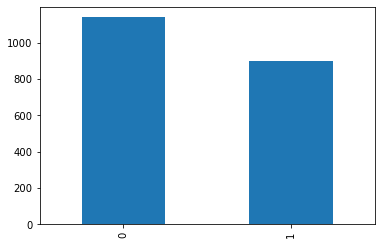

In [23]:
dt['Gender'][dt['Exited']==1].value_counts().plot(kind='bar')


Female have more numbers who have exited. This may be one of the key part of classification

In [24]:
dt['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

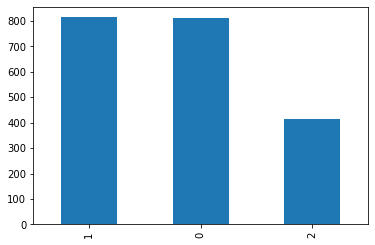

In [25]:
dt['Geography'][df['Exited']==1].value_counts().plot(kind='bar')

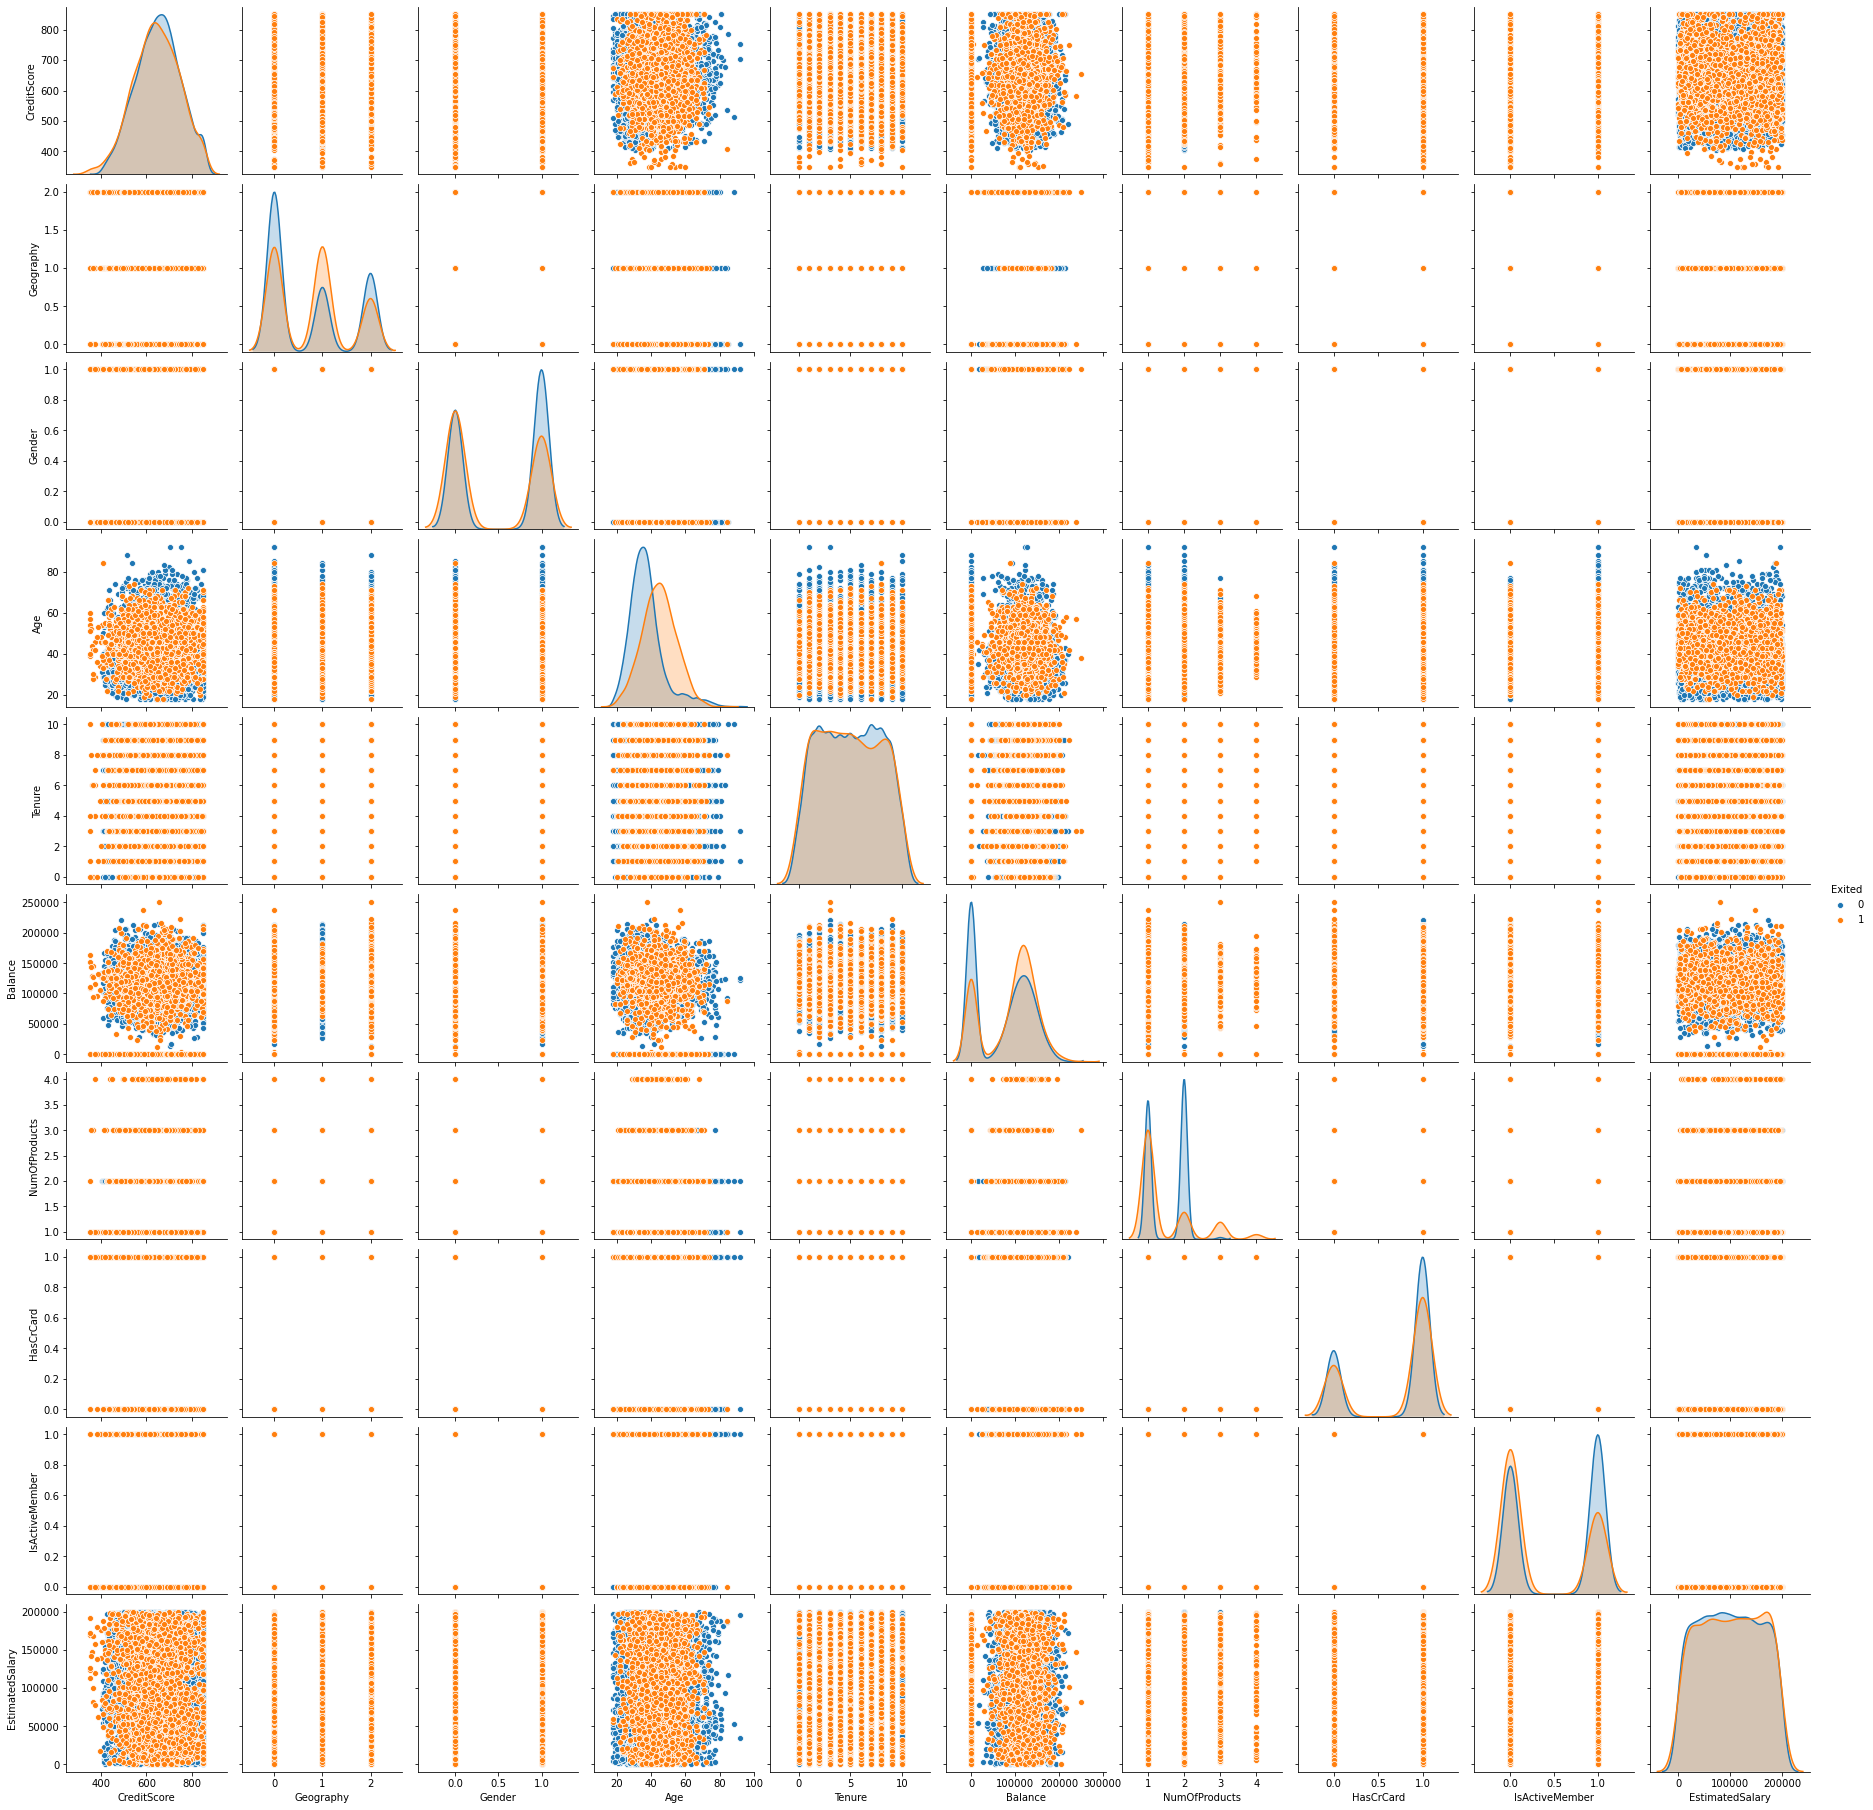

In [262]:
sns.pairplot(data=dt,diag_kind='kde',hue='Exited')

From the above pair plot, Age seems to be one of the major feature which classifies the Exits

In [26]:
X=dt.drop('Exited',axis=1)
Y=dt['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=7)

In [630]:
#Normalizing the data
from scipy.stats import zscore
X_train=X_train.apply(zscore)
X_test=X_test.apply(zscore)

In [631]:
X_train.head(10)
X_test.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1977,0.680021,1.536024,0.901493,-0.382160,-1.386183,-1.204897,2.548841,-1.558387,-1.009377,1.317826
3880,0.269977,-0.895035,-1.109272,3.183727,1.060639,-1.204897,0.808226,0.641689,0.990710,0.945308
52,1.407849,-0.895035,-1.109272,-0.574911,0.012001,-1.204897,0.808226,-1.558387,-1.009377,0.300684
2551,-1.165178,-0.895035,-1.109272,1.352595,-0.687091,-1.204897,-0.932389,0.641689,0.990710,-0.149376
2246,0.680021,1.536024,-1.109272,0.003341,0.361547,-1.204897,0.808226,0.641689,-1.009377,-0.116482
270,-0.006803,1.536024,0.901493,0.196092,1.410185,-1.204897,0.808226,-1.558387,0.990710,1.614026
601,1.141320,1.536024,-1.109272,-1.249538,0.711093,0.775425,0.808226,0.641689,0.990710,1.227791
2441,0.864541,1.536024,0.901493,-0.960412,1.759731,-1.204897,0.808226,0.641689,0.990710,-0.085688
3286,0.280228,-0.895035,-1.109272,-0.767662,-1.386183,-1.204897,0.808226,-1.558387,0.990710,0.537730
2967,-0.734632,0.320495,-1.109272,0.003341,0.012001,0.681360,2.548841,-1.558387,-1.009377,-1.655511


In [672]:
#Building the Model
model=Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(2,activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [673]:
history = model.fit(X_train, Y_train,epochs=10, batch_size=5000,validation_split=.1, verbose=1)
loss,accuracy=model.evaluate(X_train,Y_train,verbose=False)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 61ms/step - loss: 1.8945 - accuracy: 0.7949 - val_loss: 1.8217 - val_accuracy: 0.8000
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 1.8735 - accuracy: 0.7949 - val_loss: 1.8166 - val_accuracy: 0.8000
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 1.8662 - accuracy: 0.7949 - val_loss: 1.8125 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 1.8600 - accuracy: 0.79

In [687]:
predicted_values=np.round(model.predict(X_test))
print(predicted_values)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [675]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.798
Loss: 1.814


Based on the Number of Neurons and Number of layers the accuracy score is 79.8. It can be improved by changing these Hyperparameter